# Project Title : Car Price Prediction Project


# Problem Statement:
With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.

# Business Goal:
We need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the data-set
df=pd.read_csv("used_car_data.csv")
df.head(5)

,Unnamed: 0,Brand,Model,Variant,Year,Selling_Price,KM_Driven,Fuel,Transmission,Location
0,0,Hyundai,i20,2012-2014 Magna Optional 1.2,2013,"3,40,000","63,000 km",Petrol,Manual,"Geeta Colony, Delhi, Delhi"
1,1,Audi,A6,-,2016,"26,50,000","72,000 km",Petrol,Automatic,"Nandanam Nandanam, Chennai, Tamil Nadu"
2,2,Maruti Suzuki,Alto 800,2012-2016 VXI,2016,"2,95,000","37,739 km",Petrol,Manual,"Andheri East, Mumbai, Maharashtra"
3,3,Maruti Suzuki,Swift,-,2007,"2,85,000","38,000 km",Petrol,Manual,"Banaswadi Kasturi Nagar, Bengaluru, Karnataka"
4,4,Maruti Suzuki,Swift Dzire,1.2 Vxi BSIV,2015,"4,70,000","51,000 km",Petrol,Manual,"Preet Vihar, Delhi, Delhi"


In [3]:
#checking the shape of the data-set
df.shape

(18000, 10)

# Data Pre-Processing :

In [4]:
#checking the variant column
df['Variant'].value_counts()

-                                   1431
2.8Z Automatic                       896
Petrol HSE Dynamic                   450
2.5 G (Diesel) 8 Seater              450
Sportz (O) 1.4                       450
1.6 SX Plus Auto                     450
Smart Hybrid Alpha                   449
i-VTEC S                             449
1.2 Vxi BSIV                         449
i-VTEC VX                            449
LTZ                                  449
2004-2011 2.5 G4 Diesel 7-seater     449
2012-2015 85PS Diesel RxL            449
5 STR With AC Plus HTR CNG           449
2012 LTZ AT                          449
Asta 1.2 (O)                         449
VXI CNG                              448
GLS                                  448
2011-2014 VDI                        448
1.1 GVS Option                       448
SLX                                  448
1.2 VX                               448
2012-2014 Magna Optional 1.2         448
2006-2010 LXI Minor                  448
320d Sport      

# Observations :
    'Unnamed: 0' is unwanted index column

In [5]:
#dropping the unwanted columns
df.drop(['Unnamed: 0'], inplace=True, axis = 1)
df.head(5)

,Brand,Model,Variant,Year,Selling_Price,KM_Driven,Fuel,Transmission,Location
0,Hyundai,i20,2012-2014 Magna Optional 1.2,2013,"3,40,000","63,000 km",Petrol,Manual,"Geeta Colony, Delhi, Delhi"
1,Audi,A6,-,2016,"26,50,000","72,000 km",Petrol,Automatic,"Nandanam Nandanam, Chennai, Tamil Nadu"
2,Maruti Suzuki,Alto 800,2012-2016 VXI,2016,"2,95,000","37,739 km",Petrol,Manual,"Andheri East, Mumbai, Maharashtra"
3,Maruti Suzuki,Swift,-,2007,"2,85,000","38,000 km",Petrol,Manual,"Banaswadi Kasturi Nagar, Bengaluru, Karnataka"
4,Maruti Suzuki,Swift Dzire,1.2 Vxi BSIV,2015,"4,70,000","51,000 km",Petrol,Manual,"Preet Vihar, Delhi, Delhi"


In [6]:
##changing the dtype and striping the unwanted commas,words from the data

#Kilometers Driven
df['KM_Driven'] = df['KM_Driven'].str.replace('km','')
df['KM_Driven'] = df['KM_Driven'].str.replace(',','')
df['KM_Driven'] = df['KM_Driven'].str.replace('-','0')

#converting into int
df['KM_Driven'] = df['KM_Driven'].astype(int)

In [7]:
#finding mean for kms driven
kmsmean = df['KM_Driven'].mean()
kmsmean

65147.55127777778

In [8]:
#Replacing 0 with mean value in kms driven
df['KM_Driven'] = df['KM_Driven'].apply(lambda x: x if x!=0 else kmsmean)

In [9]:
#Price
df['Selling_Price'] = df['Selling_Price'].str.strip()
df['Selling_Price'] = df['Selling_Price'].str.replace(',','')
df['Selling_Price'] = df['Selling_Price'].str.replace('-','0')

#converting into float
df['Selling_Price'] = df['Selling_Price'].astype(float)

In [10]:
#finding mean for kms driven
pricemean = df['Selling_Price'].mean()
pricemean

662853.2136111112

In [11]:
#Replacing 0 with mean value in kms driven
df['Selling_Price'] = df['Selling_Price'].apply(lambda x: x if x!=0 else pricemean)

In [12]:
#Year_of_Manufacturing
df['Year'] = df['Year'].apply(lambda x: int(x.strip()[0:4]) if x!='-' else 0)

# median year
median_year=df['Year'].median()

#Replacing 0 with median value
df['Year'] = df['Year'].apply(lambda x: x if x!=0 else median_year)

#converting into int
df['Year'] = df['Year'].astype(int)

In [13]:
# Fuel Type

df['Fuel'].value_counts()

Petrol           9400
Diesel           7168
CNG & Hybrids    1345
-                  87
Name: Fuel, dtype: int64

In [14]:
# mode for fuel
Fuel_mode = df['Fuel'].mode()
Fuel_mode

0    Petrol
dtype: object

In [15]:
# Fuel type 
df['Fuel'] = df['Fuel'].apply(lambda x: x if x!='-' else 0)

#Replacing 0 with mode value
df['Fuel'] = df['Fuel'].apply(lambda x: x if x!=0 else "Petrol")

df['Fuel'].value_counts()

Petrol           9487
Diesel           7168
CNG & Hybrids    1345
Name: Fuel, dtype: int64

In [16]:
# Transmission Type
df['Transmission'].value_counts()

Manual       14772
Automatic     3141
-               87
Name: Transmission, dtype: int64

In [17]:
#replacing the "-" with manual
df['Transmission'] = df['Transmission'].apply(lambda x: x if x!='-' else 'Manual')

df['Transmission'].value_counts()

Manual       14859
Automatic     3141
Name: Transmission, dtype: int64

In [18]:
# Brand
df['Brand'].value_counts()

Maruti Suzuki    4476
Hyundai          3585
Toyota           2689
Honda            1345
Chevrolet        1345
Mahindra         1342
Tata              890
Land Rover        450
Renault           449
Audi              448
BMW               448
Ford              446
-                  87
Name: Brand, dtype: int64

In [19]:
#replacing the "-" with others
df['Brand'] = df['Brand'].apply(lambda x: x if x!='-' else 'others')
df['Brand'].value_counts()

Maruti Suzuki    4476
Hyundai          3585
Toyota           2689
Honda            1345
Chevrolet        1345
Mahindra         1342
Tata              890
Land Rover        450
Renault           449
Audi              448
BMW               448
Ford              446
others             87
Name: Brand, dtype: int64

In [20]:
# Model
df['Model'].value_counts()

Elite i20             899
Innova                899
Cruze                 898
City                  898
Innova Crysta         896
Swift                 896
i20                   895
Swift Dzire           892
Nano                  890
Range Rover Evoque    450
Creta                 450
Ciaz                  449
Duster                449
Eeco                  449
Santro Xing           448
Wagon R               448
Ertiga                448
3 Series              448
XUV300                448
A6                    448
Bolero                448
Getz Prime            448
Etios Liva            448
Beat                  447
Zen Estilo            447
Civic                 447
Alto 800              447
Xylo                  446
Ecosport              446
Fortuner              446
EON                   445
-                      87
Name: Model, dtype: int64

In [21]:
#replacing the "-" with others in Model
df['Model'] = df['Model'].apply(lambda x: x if x!='-' else 'others')
df['Model'].value_counts()

Elite i20             899
Innova                899
Cruze                 898
City                  898
Innova Crysta         896
Swift                 896
i20                   895
Swift Dzire           892
Nano                  890
Range Rover Evoque    450
Creta                 450
Eeco                  449
Duster                449
Ciaz                  449
Etios Liva            448
Santro Xing           448
Wagon R               448
Ertiga                448
XUV300                448
A6                    448
Bolero                448
Getz Prime            448
3 Series              448
Zen Estilo            447
Beat                  447
Civic                 447
Alto 800              447
Xylo                  446
Ecosport              446
Fortuner              446
EON                   445
others                 87
Name: Model, dtype: int64

In [22]:
# Location
df['Location'].value_counts()

Sector 37, Gurgaon, Haryana                      1345
Pimpri Chinchwad, Pune, Maharashtra              1343
Moonnamkutty, Kollam, Kerala                      896
Banaswadi Kasturi Nagar, Bengaluru, Karnataka     895
BTM Layout, Bengaluru, Karnataka                  893
Kalkaji, Delhi, Delhi                             893
Dwarka, Delhi, Delhi                              892
Udhana Gam, Surat, Gujarat                        450
Greater Kailash 1, Delhi, Delhi                   450
Airoli, Navi Mumbai, Maharashtra                  450
Preet Vihar, Delhi, Delhi                         449
Greater Noida West, Noida, Uttar Pradesh          449
Netaji Subhash Place, Delhi, Delhi                449
Thane West, Thane, Maharashtra                    449
Varun Niketan, Delhi, Delhi                       449
Indira Nagar, Bengaluru, Karnataka                449
Tilak Nagar, Delhi, Delhi                         449
Kankurgachhi, Kolkata, West Bengal                449
Sector 19D, Chandigarh, Chan

In [23]:
#replacing the "-" with others in Model
df['Location'] = df['Location'].apply(lambda x: x if x!='-' else 'others')
df['Location'].value_counts()

Sector 37, Gurgaon, Haryana                      1345
Pimpri Chinchwad, Pune, Maharashtra              1343
Moonnamkutty, Kollam, Kerala                      896
Banaswadi Kasturi Nagar, Bengaluru, Karnataka     895
Kalkaji, Delhi, Delhi                             893
BTM Layout, Bengaluru, Karnataka                  893
Dwarka, Delhi, Delhi                              892
Greater Kailash 1, Delhi, Delhi                   450
Udhana Gam, Surat, Gujarat                        450
Airoli, Navi Mumbai, Maharashtra                  450
Thane West, Thane, Maharashtra                    449
Varun Niketan, Delhi, Delhi                       449
Indira Nagar, Bengaluru, Karnataka                449
Kankurgachhi, Kolkata, West Bengal                449
Preet Vihar, Delhi, Delhi                         449
Netaji Subhash Place, Delhi, Delhi                449
Tilak Nagar, Delhi, Delhi                         449
Greater Noida West, Noida, Uttar Pradesh          449
Patel Nagar 3, Ghaziabad, Ut

In [24]:
# Location
df['Variant'].value_counts()

-                                   1431
2.8Z Automatic                       896
Petrol HSE Dynamic                   450
2.5 G (Diesel) 8 Seater              450
Sportz (O) 1.4                       450
1.6 SX Plus Auto                     450
Smart Hybrid Alpha                   449
i-VTEC S                             449
1.2 Vxi BSIV                         449
i-VTEC VX                            449
LTZ                                  449
2004-2011 2.5 G4 Diesel 7-seater     449
2012-2015 85PS Diesel RxL            449
5 STR With AC Plus HTR CNG           449
2012 LTZ AT                          449
Asta 1.2 (O)                         449
VXI CNG                              448
GLS                                  448
2011-2014 VDI                        448
1.1 GVS Option                       448
SLX                                  448
1.2 VX                               448
2012-2014 Magna Optional 1.2         448
2006-2010 LXI Minor                  448
320d Sport      

In [25]:
#replacing the "-" with others in Model
df['Variant'] = df['Variant'].apply(lambda x: x if x!='-' else 'others')
df['Variant'].value_counts()

others                              1431
2.8Z Automatic                       896
2.5 G (Diesel) 8 Seater              450
Sportz (O) 1.4                       450
1.6 SX Plus Auto                     450
Petrol HSE Dynamic                   450
2004-2011 2.5 G4 Diesel 7-seater     449
i-VTEC S                             449
1.2 Vxi BSIV                         449
i-VTEC VX                            449
LTZ                                  449
Smart Hybrid Alpha                   449
Asta 1.2 (O)                         449
2012-2015 85PS Diesel RxL            449
2012 LTZ AT                          449
5 STR With AC Plus HTR CNG           449
GLS                                  448
2012-2014 Magna Optional 1.2         448
1.2 VX                               448
320d Sport                           448
VXI CNG                              448
SLX                                  448
2006-2010 LXI Minor                  448
2011-2014 VDI                        448
1.1 GVS Option  

In [26]:
df.dtypes

Brand             object
Model             object
Variant           object
Year               int32
Selling_Price    float64
KM_Driven        float64
Fuel              object
Transmission      object
Location          object
dtype: object

In [27]:
df.head(10)

,Brand,Model,Variant,Year,Selling_Price,KM_Driven,Fuel,Transmission,Location
0,Hyundai,i20,2012-2014 Magna Optional 1.2,2013,3.400000e+05,63000.000000,Petrol,Manual,"Geeta Colony, Delhi, Delhi"
1,Audi,A6,others,2016,2.650000e+06,72000.000000,Petrol,Automatic,"Nandanam Nandanam, Chennai, Tamil Nadu"
2,Maruti Suzuki,Alto 800,2012-2016 VXI,2016,2.950000e+05,37739.000000,Petrol,Manual,"Andheri East, Mumbai, Maharashtra"
3,Maruti Suzuki,Swift,others,2007,2.850000e+05,38000.000000,Petrol,Manual,"Banaswadi Kasturi Nagar, Bengaluru, Karnataka"
4,Maruti Suzuki,Swift Dzire,1.2 Vxi BSIV,2015,4.700000e+05,51000.000000,Petrol,Manual,"Preet Vihar, Delhi, Delhi"
5,Chevrolet,Beat,Diesel LS,2013,2.850000e+05,43000.000000,Diesel,Manual,"Banaswadi Kasturi Nagar, Bengaluru, Karnataka"
6,Maruti Suzuki,Wagon R,2006-2010 LXI Minor,2008,1.750000e+05,47000.000000,Petrol,Manual,"Moonnamkutty, Kollam, Kerala"
7,Chevrolet,Cruze,LTZ,2013,3.250000e+05,73000.000000,Diesel,Manual,"Tilak Nagar, Delhi, Delhi"
8,others,others,others,2013,6.628532e+05,65147.551278,Petrol,Manual,others
9,Hyundai,Elite i20,Asta 1.2 (O),2019,8.450000e+05,26000.000000,Petrol,Manual,"Indira Nagar, Bengaluru, Karnataka"


In [28]:
#checking all the column names
list(df.columns)

['Brand',
 'Model',
 'Variant',
 'Year',
 'Selling_Price',
 'KM_Driven',
 'Fuel',
 'Transmission',
 'Location']

In [29]:
df = df[['Brand', 'Variant', 'Model', 'Year', 'Transmission', 'Fuel', 'KM_Driven', 'Location', 'Selling_Price']]
df.sample(5)

,Brand,Variant,Model,Year,Transmission,Fuel,KM_Driven,Location,Selling_Price
15237,Hyundai,1.1 GVS Option,Getz Prime,2009,Manual,Petrol,38000.0,"Pimpri Chinchwad, Pune, Maharashtra",160000.0
16231,Mahindra,others,XUV300,2019,Manual,Diesel,19000.0,"Sector 8B, Chandigarh, Chandigarh",1050000.0
11373,Maruti Suzuki,LXI Option,Swift Dzire,2015,Manual,Petrol,48000.0,"Dwarka, Delhi, Delhi",395000.0
9883,Maruti Suzuki,others,Swift,2007,Manual,Petrol,38000.0,"Banaswadi Kasturi Nagar, Bengaluru, Karnataka",285000.0
4726,Maruti Suzuki,2006-2010 LXI Minor,Wagon R,2008,Manual,Petrol,47000.0,"Moonnamkutty, Kollam, Kerala",195000.0


In [30]:
(df['Brand'] == 'others').sum()

87

In [31]:
df.shape

(18000, 9)

In [32]:
drop87 = df[df['Brand'] == 'others'].index
df.drop(drop87, inplace = True)

In [33]:
df.shape

(17913, 9)

In [34]:
(df['Brand'] == 'others').sum()

0

In [35]:
#checking the data type and null values of the variables in the data-set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17913 entries, 0 to 17999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          17913 non-null  object 
 1   Variant        17913 non-null  object 
 2   Model          17913 non-null  object 
 3   Year           17913 non-null  int32  
 4   Transmission   17913 non-null  object 
 5   Fuel           17913 non-null  object 
 6   KM_Driven      17913 non-null  float64
 7   Location       17913 non-null  object 
 8   Selling_Price  17913 non-null  float64
dtypes: float64(2), int32(1), object(6)
memory usage: 1.3+ MB


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,17913.0,2013.352426,3.624825,2006.0,2010.0,2013.0,2016.0,2020.0
KM_Driven,17913.0,65463.960420,33416.204594,14000.0,38000.0,62000.0,78001.0,140000.0
Selling_Price,17913.0,664286.851672,761820.570473,55000.0,295000.0,360000.0,774000.0,4750000.0


In [37]:
# Describing object types
df.describe(include='object').T

,count,unique,top,freq
Brand,17913,12,Maruti Suzuki,4476
Variant,17913,37,others,1344
Model,17913,31,Elite i20,899
Transmission,17913,2,Manual,14772
Fuel,17913,3,Petrol,9400
Location,17913,31,"Sector 37, Gurgaon, Haryana",1345


# Handling the Null Values :

In [38]:
#checking the null values 
for col in df.columns:print("\nTitle :",col,"\nNaN val:",df[col].isnull().sum())


Title : Brand 
NaN val: 0

Title : Variant 
NaN val: 0

Title : Model 
NaN val: 0

Title : Year 
NaN val: 0

Title : Transmission 
NaN val: 0

Title : Fuel 
NaN val: 0

Title : KM_Driven 
NaN val: 0

Title : Location 
NaN val: 0

Title : Selling_Price 
NaN val: 0


<AxesSubplot:>

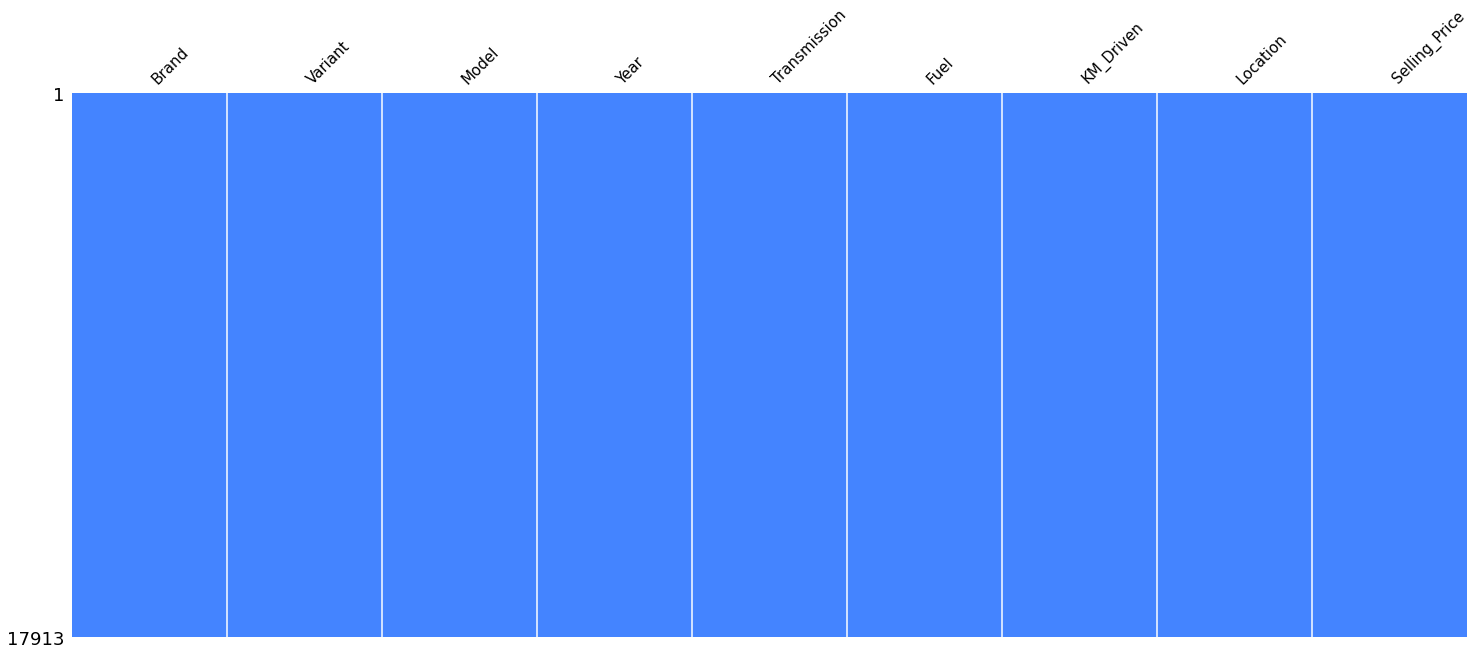

In [39]:
# Program to visualize missing values in dataset
# Importing the libraries
import missingno as msno
# Visualize missing values as a matrix
msno.matrix(df,labels=True, sparkline=False, figsize=(25,10), fontsize=15, color=(0.27, 0.52, 1.0))

# Catagorical Variables :

In [40]:
cat_List = [x for x in df.columns if df[x].dtype==object]
list (cat_List)

['Brand', 'Variant', 'Model', 'Transmission', 'Fuel', 'Location']

# Continous Variables :

In [41]:
num_List = [x for x in df.columns if x not in cat_List]
list (num_List)

['Year', 'KM_Driven', 'Selling_Price']

# DATA VISUALIZATION :

UNI-VARIATE ANALYSIS :

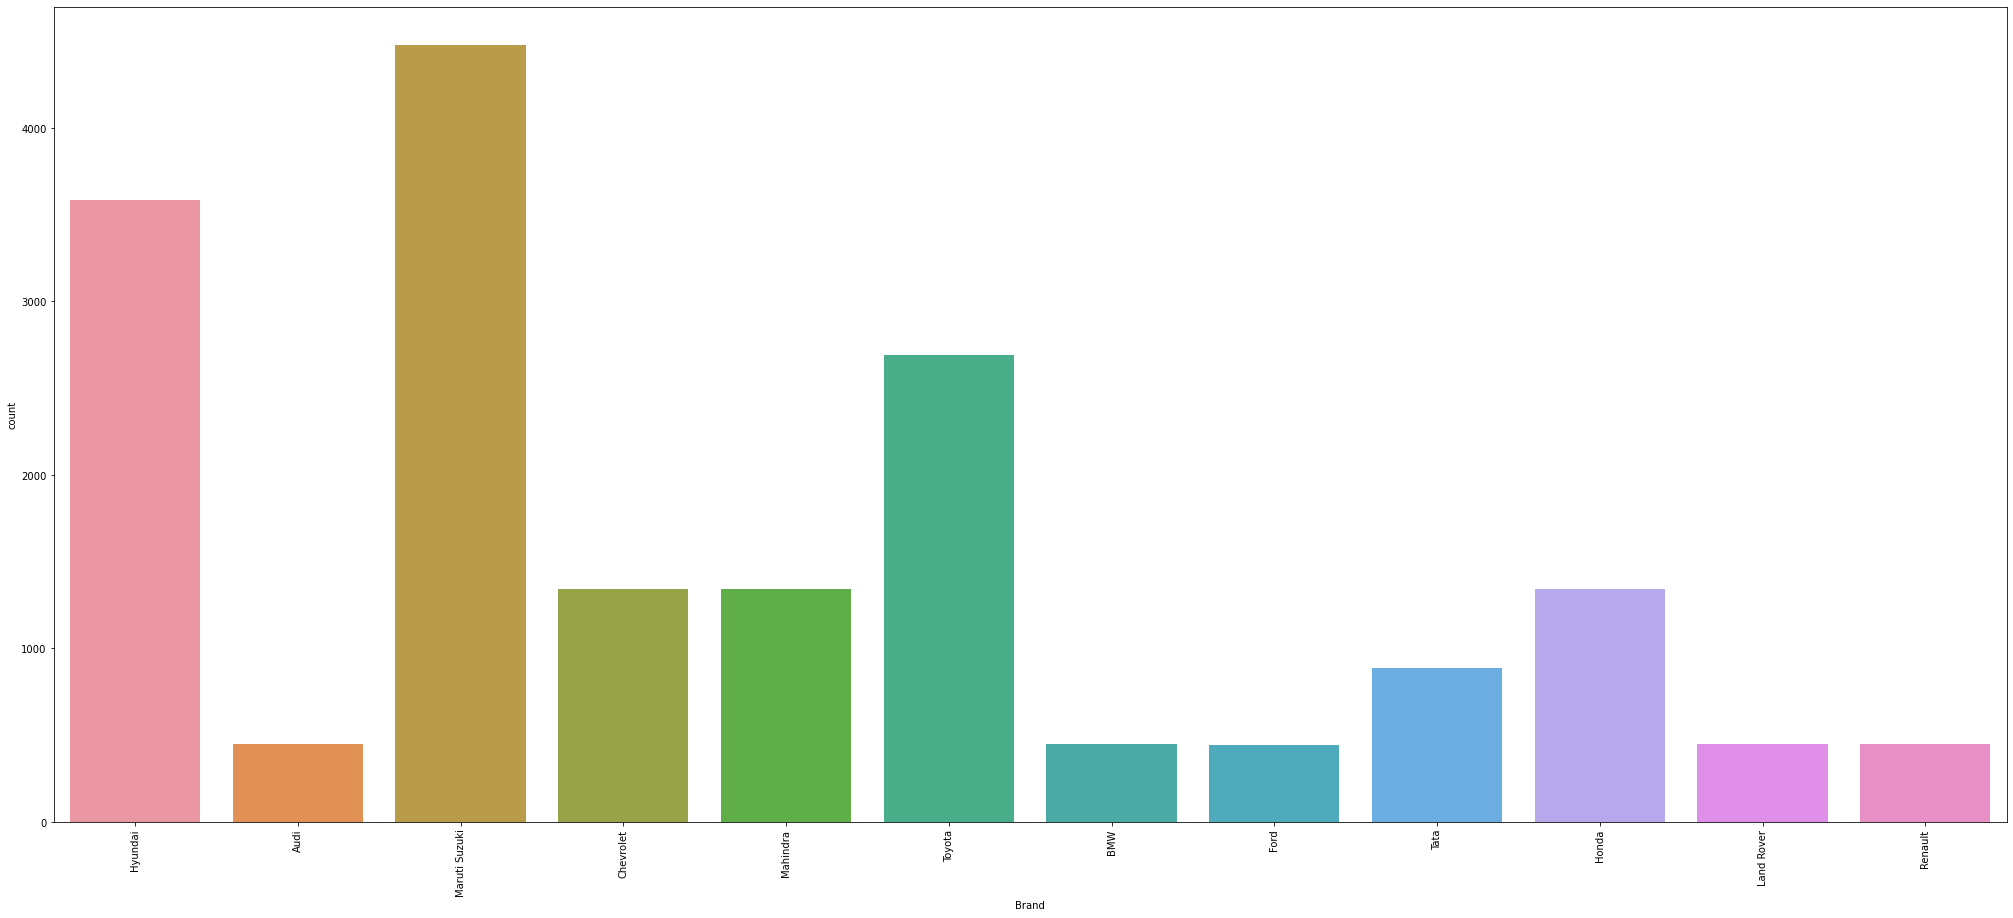

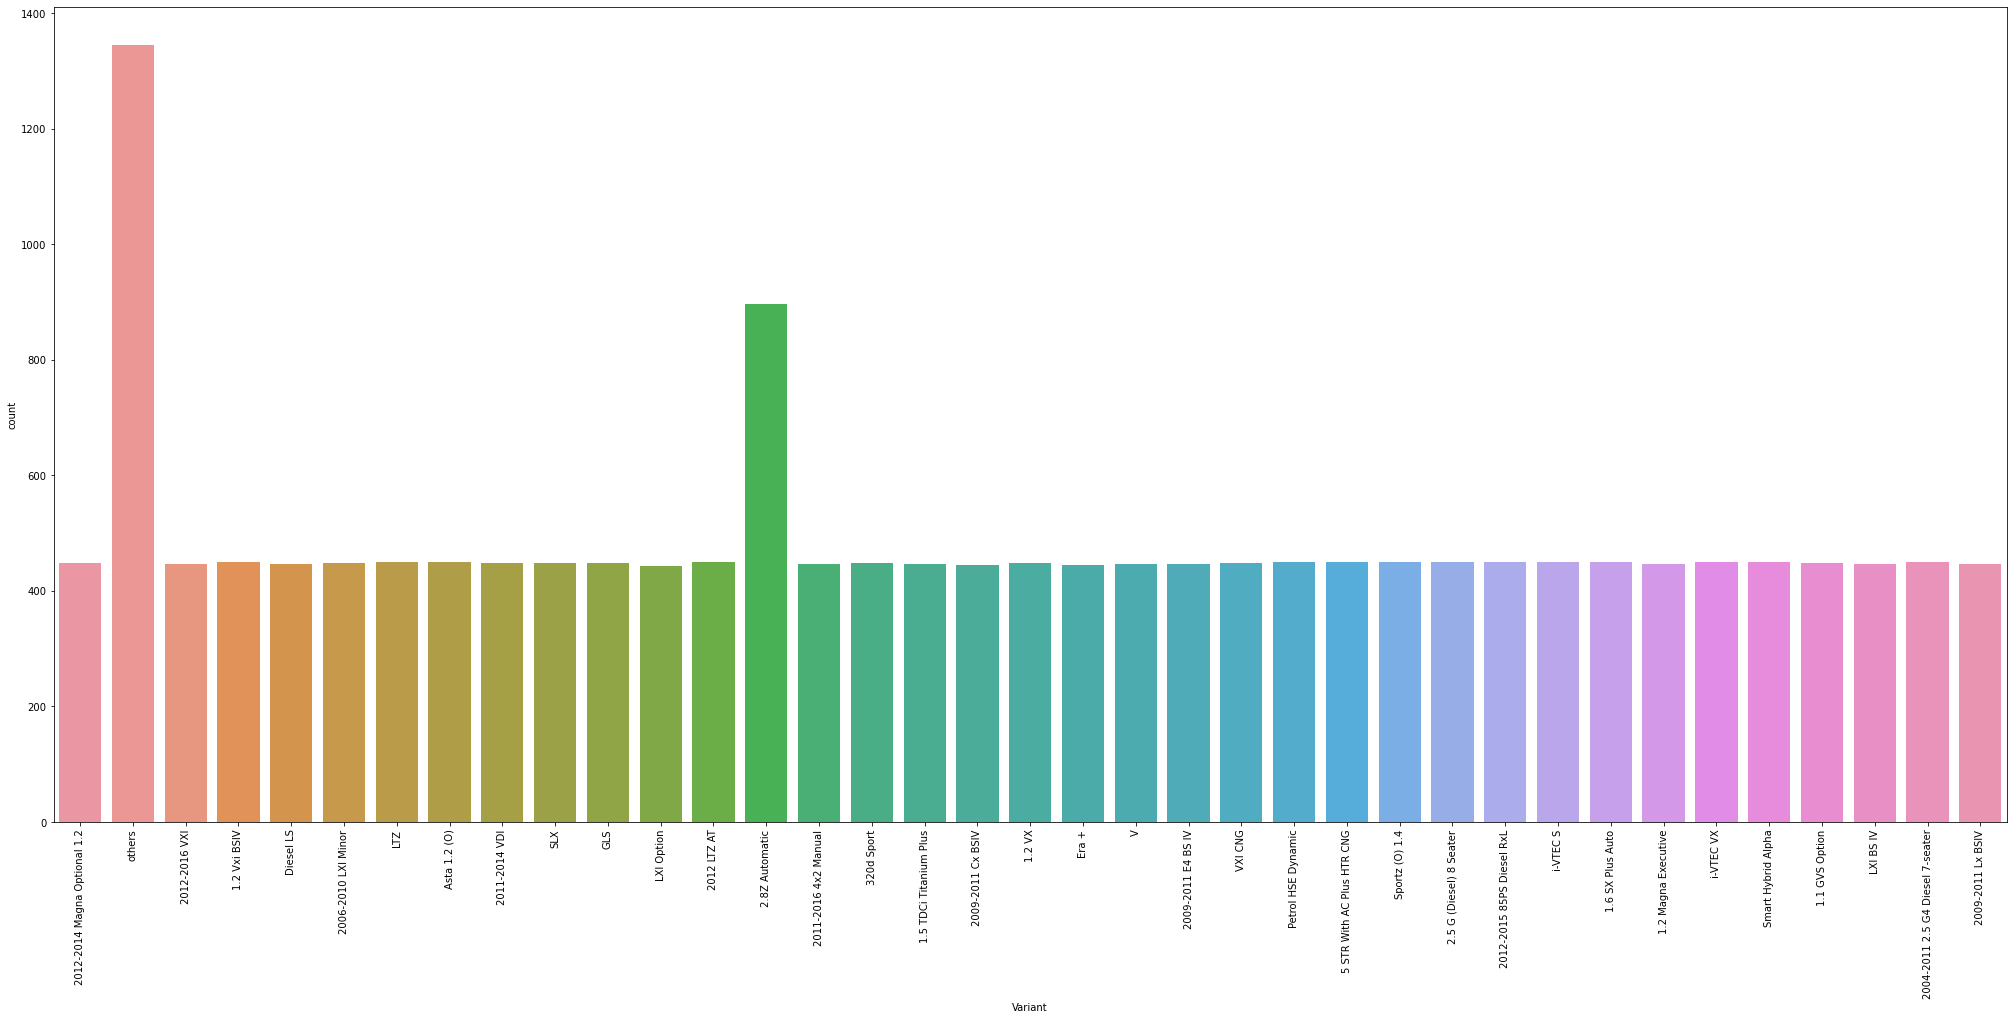

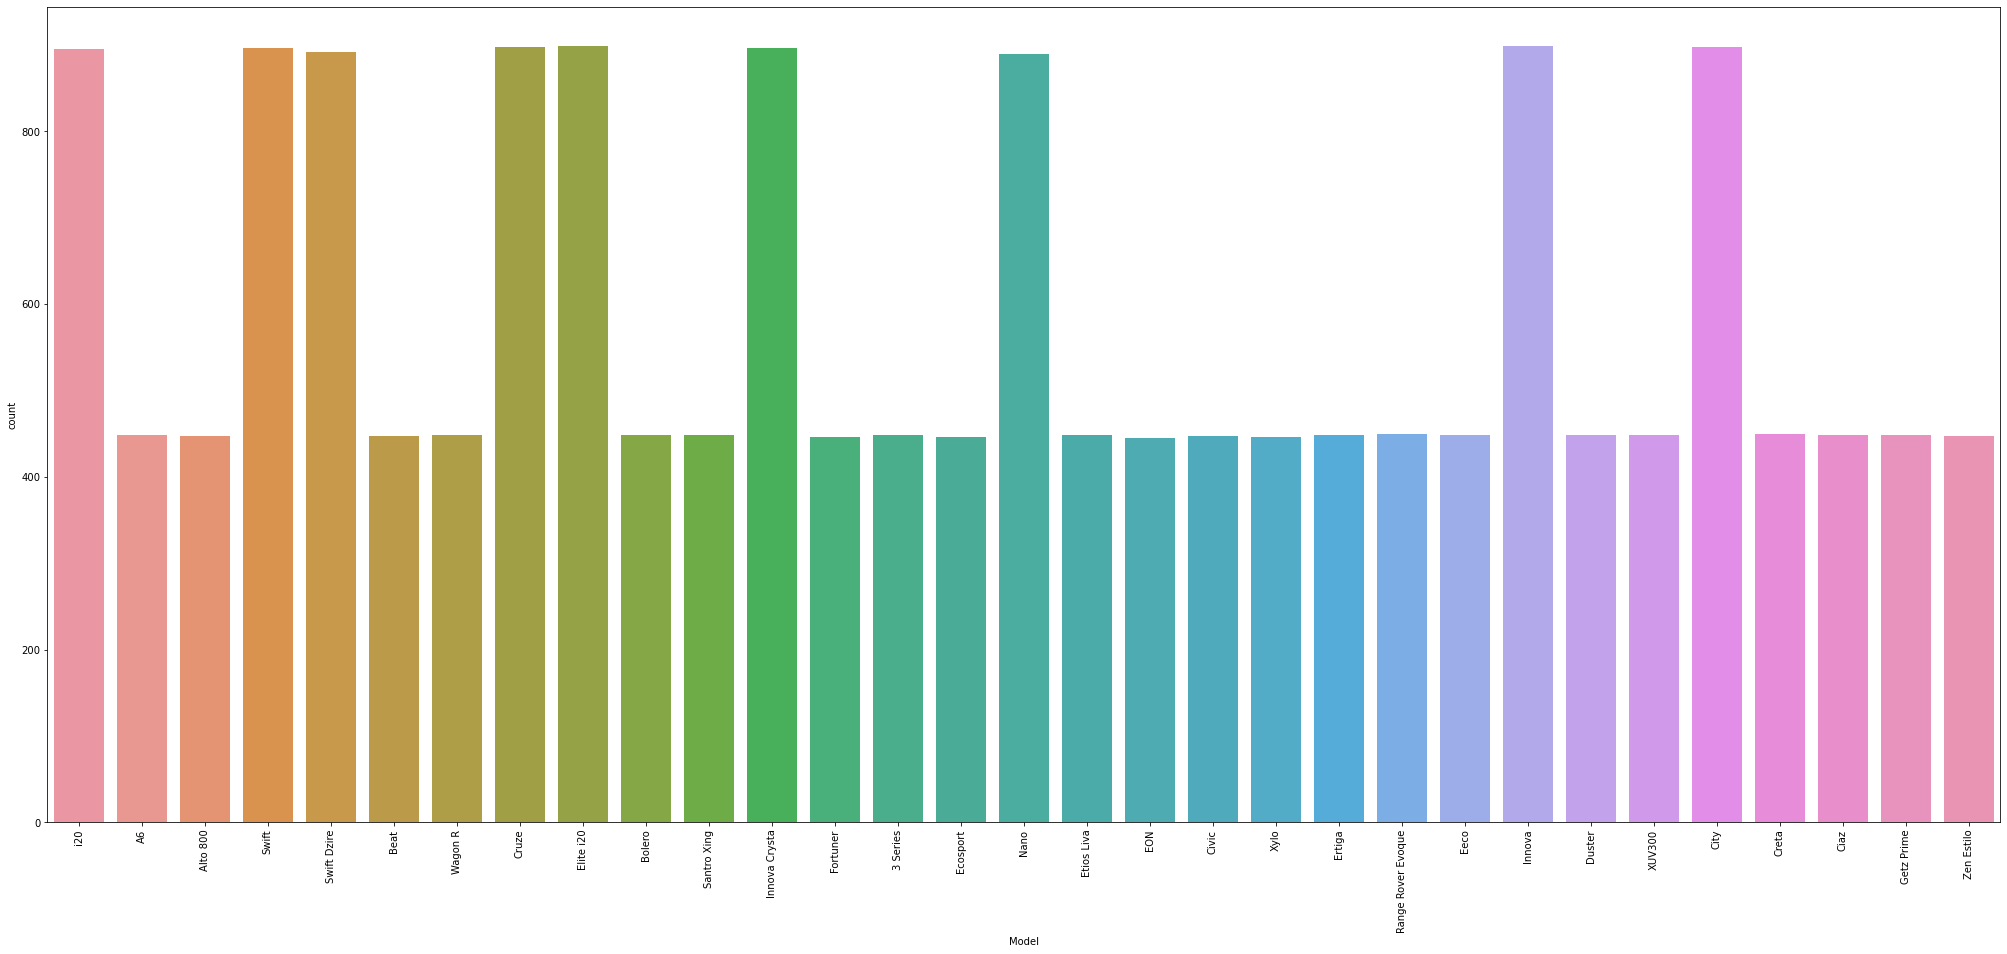

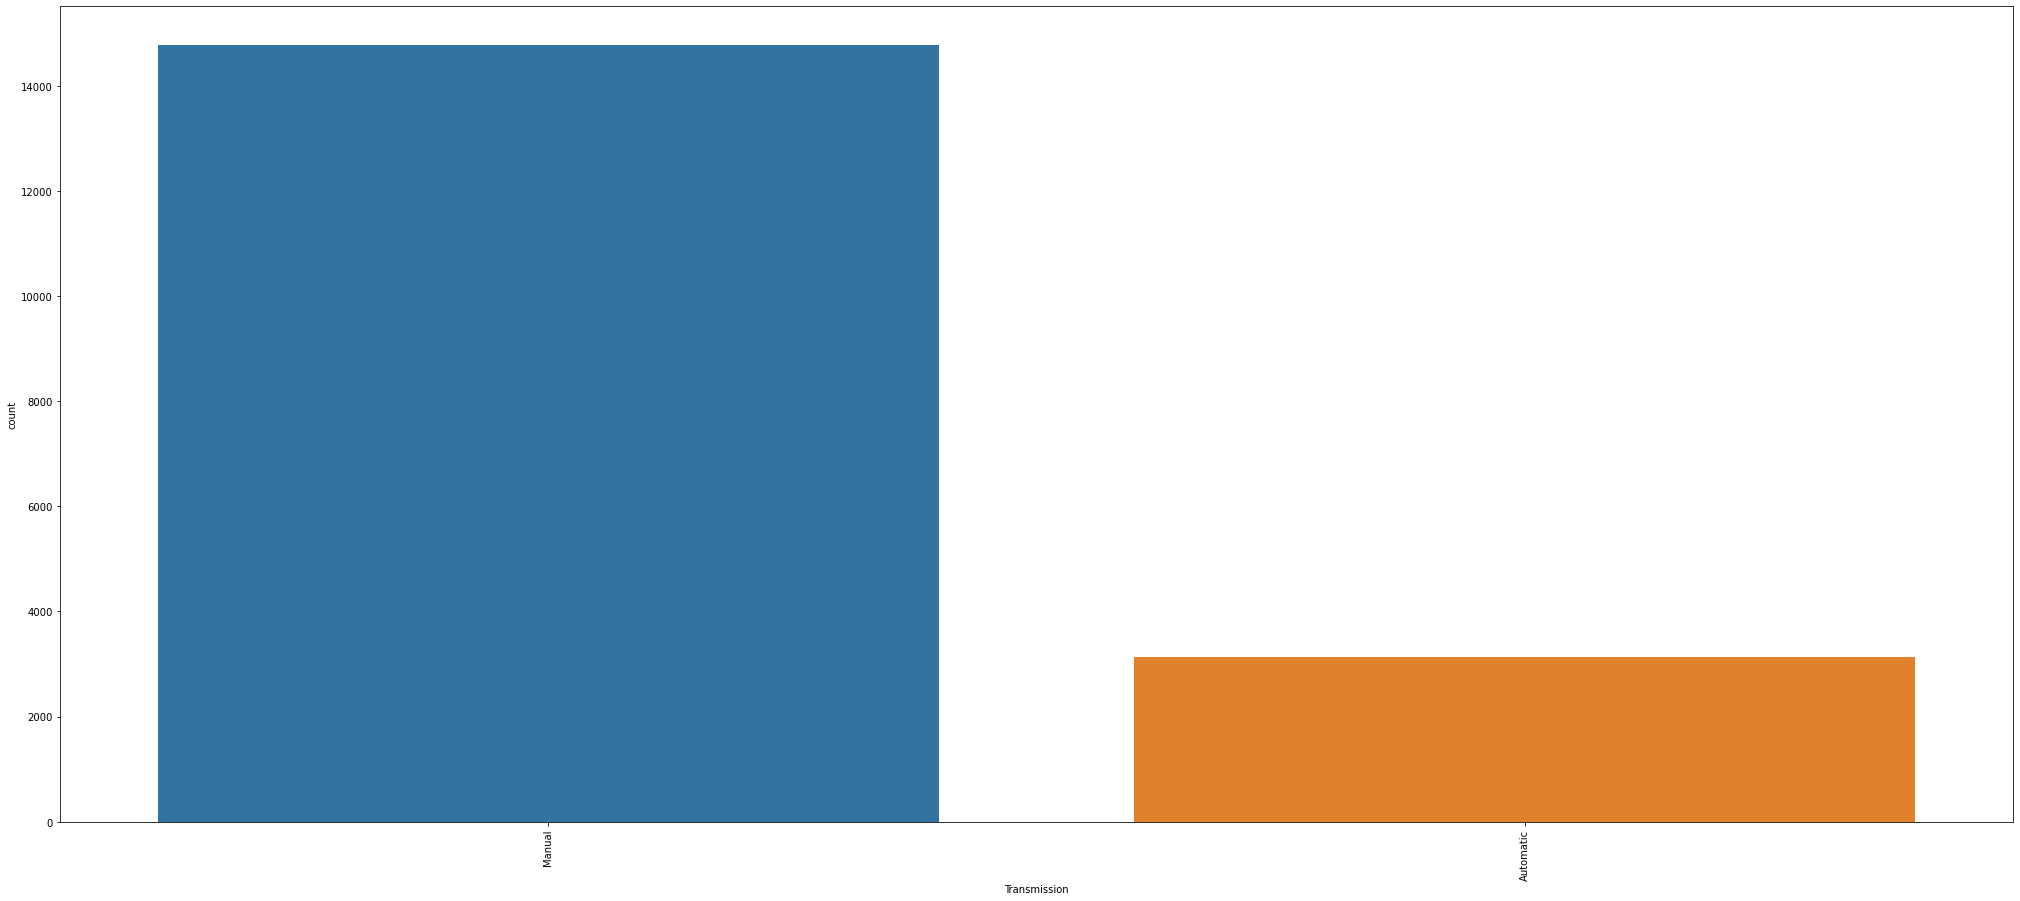

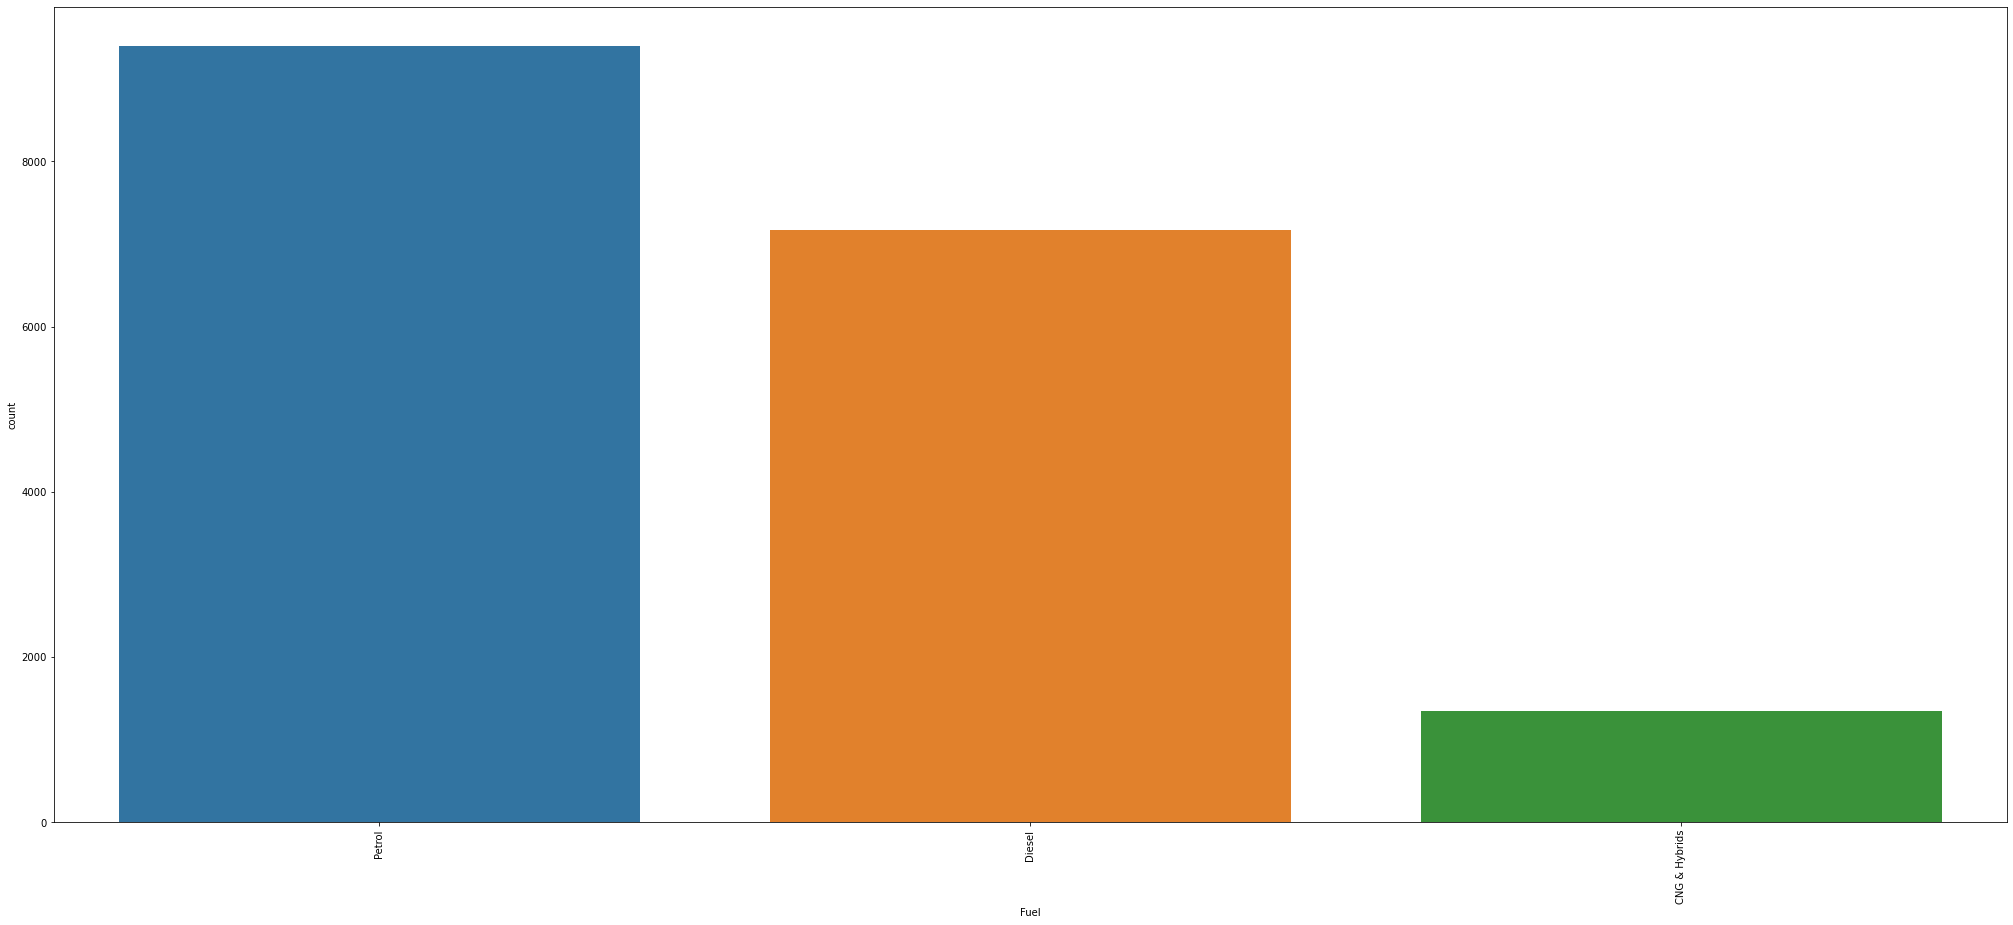

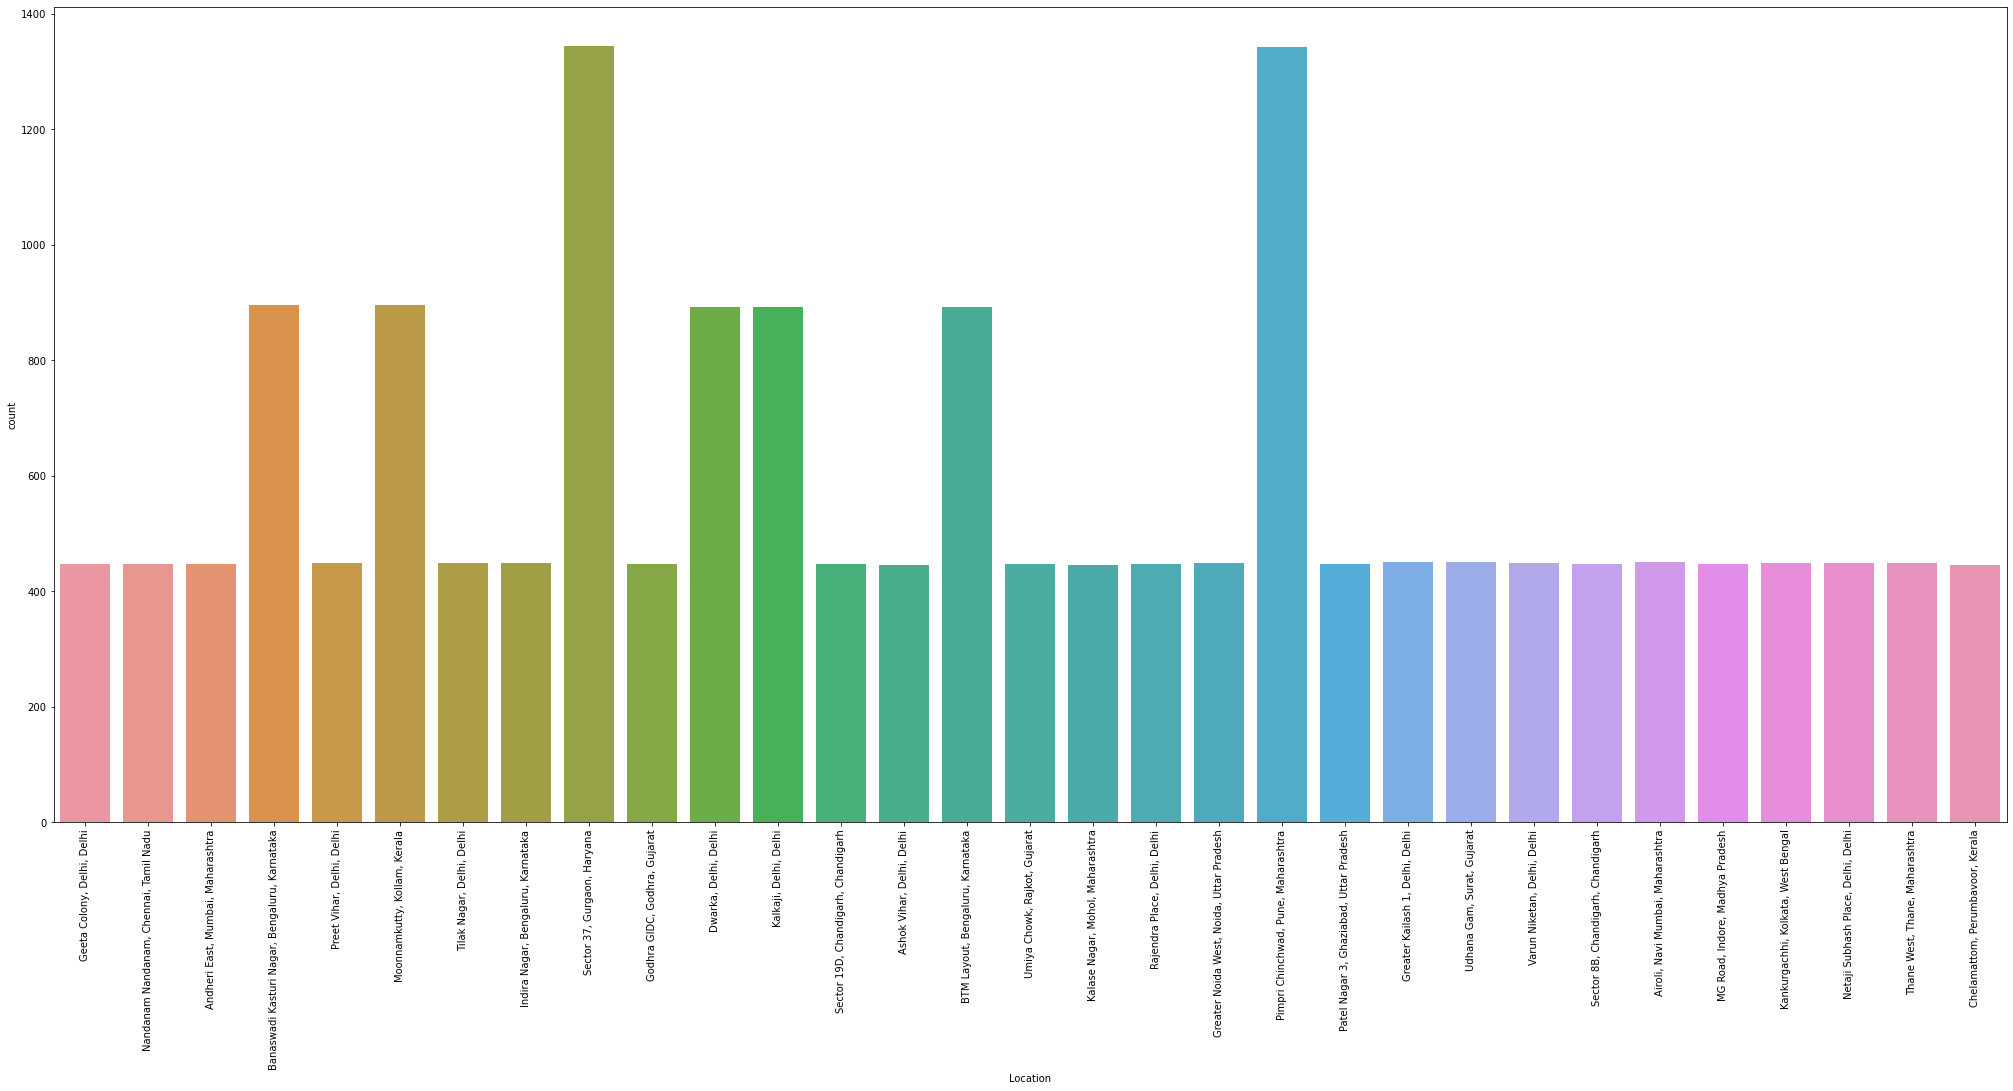

In [42]:
for i in cat_List:
    plt.figure(figsize=(35,15))
    sn.countplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

# BI-VARIATE ANALYSIS :

<Figure size 2160x1800 with 0 Axes>

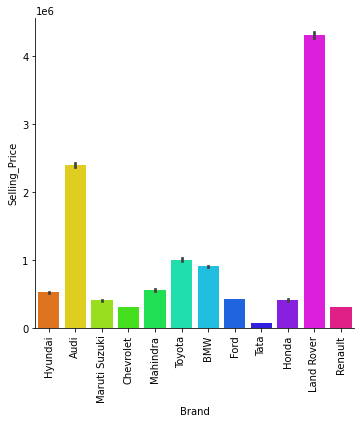

<Figure size 2160x1800 with 0 Axes>

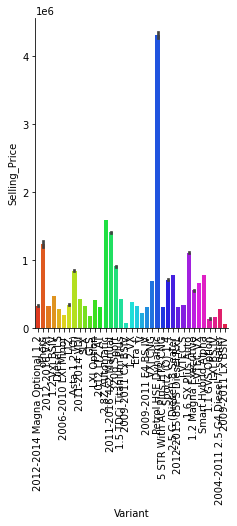

<Figure size 2160x1800 with 0 Axes>

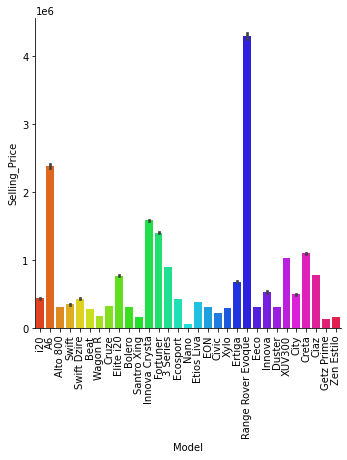

<Figure size 2160x1800 with 0 Axes>

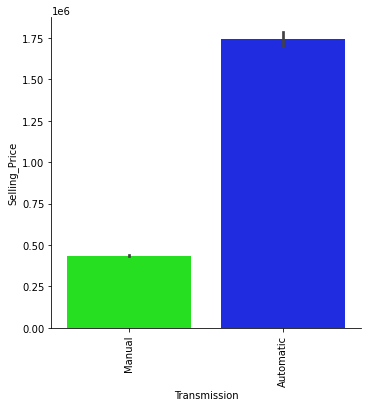

<Figure size 2160x1800 with 0 Axes>

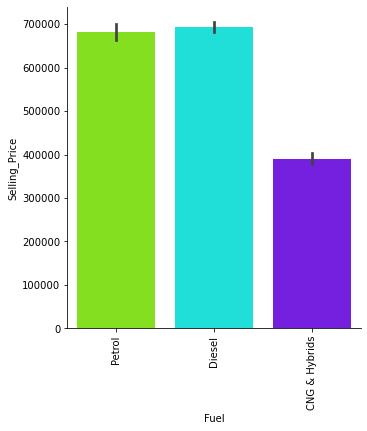

<Figure size 2160x1800 with 0 Axes>

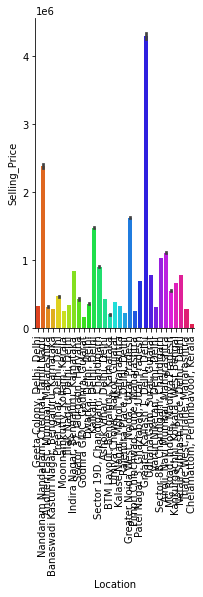

In [43]:
for i in cat_List:
    plt.figure(figsize=(30,25))
    sn.catplot(y='Selling_Price',x=i,data=df,kind="bar",palette="hsv")
    plt.xticks(rotation=90)
    plt.show()

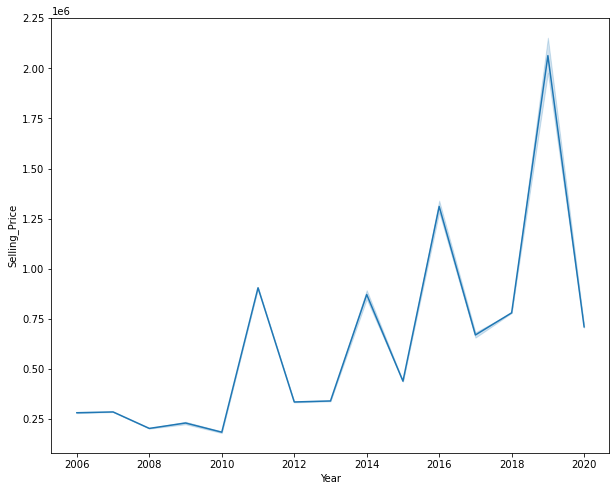

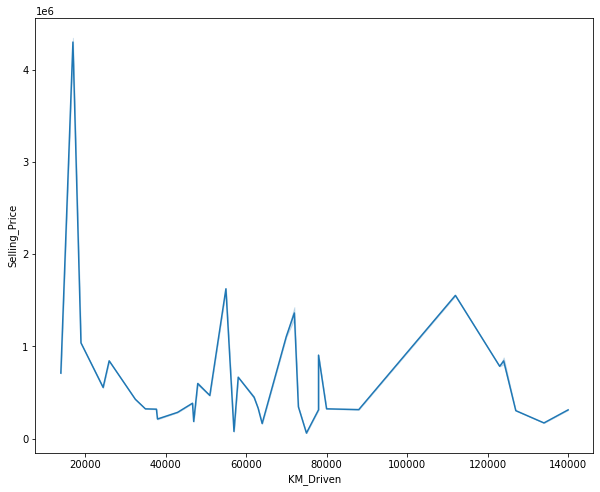

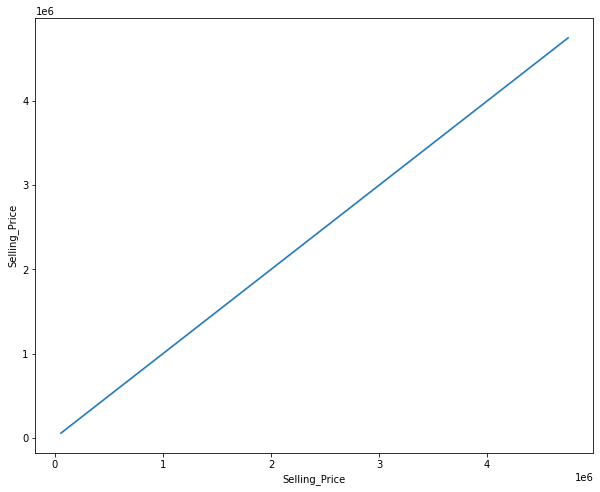

In [44]:
for i in num_List:
    plt.figure(figsize=(10,8))
    sn.lineplot(y='Selling_Price',x=i,data=df)
    plt.show()

In [45]:
df.head(0)

,Brand,Variant,Model,Year,Transmission,Fuel,KM_Driven,Location,Selling_Price


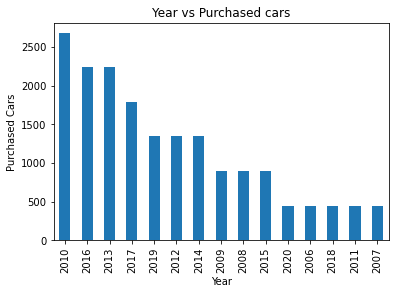

In [46]:
#Plotting year vs no of cars
purchased_car_per_year = df['Year'].value_counts()
purchased_car_per_year.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Purchased Cars")
plt.title("Year vs Purchased cars")
plt.show()

# Feature Engineering:
# Now we will use Label Encoder to change catagorical values to Numerical values.
# LabelEncoder

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_List:
    df[i] = le.fit_transform(df[i].astype(str))
print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17913 entries, 0 to 17999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          17913 non-null  int32  
 1   Variant        17913 non-null  int32  
 2   Model          17913 non-null  int32  
 3   Year           17913 non-null  int32  
 4   Transmission   17913 non-null  int32  
 5   Fuel           17913 non-null  int32  
 6   KM_Driven      17913 non-null  float64
 7   Location       17913 non-null  int32  
 8   Selling_Price  17913 non-null  float64
dtypes: float64(2), int32(7)
memory usage: 1.5 MB
None


In [48]:
#Checking the dataset
df.head()

,Brand,Variant,Model,Year,Transmission,Fuel,KM_Driven,Location,Selling_Price
0,5,16,30,2013,1,2,63000.0,7,340000.0
1,0,36,1,2016,0,2,72000.0,17,2650000.0
2,8,18,2,2016,1,2,37739.0,1,295000.0
3,8,36,24,2007,1,2,38000.0,4,285000.0
4,8,3,25,2015,1,2,51000.0,21,470000.0


In [49]:
#Statistical summary of the dataset
df.describe()

,Brand,Variant,Model,Year,Transmission,Fuel,KM_Driven,Location,Selling_Price
count,17913.000000,17913.000000,17913.000000,17913.000000,17913.000000,17913.000000,17913.000000,17913.000000,1.791300e+04
mean,6.598727,18.627980,15.818512,2013.352426,0.824652,1.449673,65463.960420,14.884776,6.642869e+05
std,2.990211,11.151508,8.736219,3.624825,0.380275,0.630603,33416.204594,8.722626,7.618206e+05
min,0.000000,0.000000,0.000000,2006.000000,0.000000,0.000000,14000.000000,0.000000,5.500000e+04
25%,5.000000,8.000000,8.000000,2010.000000,1.000000,1.000000,38000.000000,7.000000,2.950000e+05
50%,7.000000,19.000000,16.000000,2013.000000,1.000000,2.000000,62000.000000,16.000000,3.600000e+05
75%,8.000000,29.000000,23.000000,2016.000000,1.000000,2.000000,78001.000000,23.000000,7.740000e+05
max,11.000000,36.000000,30.000000,2020.000000,1.000000,2.000000,140000.000000,30.000000,4.750000e+06


In [50]:
#Checking correlation of the dataset
corr=df.corr()  #corr() function provides the correlation value of each column
corr

,Brand,Variant,Model,Year,Transmission,Fuel,KM_Driven,Location,Selling_Price
Brand,1.000000,-0.357354,0.474785,-0.097842,0.224600,-0.104210,0.246958,0.174485,-0.055908
Variant,-0.357354,1.000000,-0.319339,0.154980,0.079168,-0.025789,-0.198442,-0.015510,0.158498
Model,0.474785,-0.319339,1.000000,-0.084001,0.231520,0.091163,-0.048848,0.081709,-0.042482
Year,-0.097842,0.154980,-0.084001,1.000000,-0.246251,0.041037,-0.429918,-0.041495,0.523487
Transmission,0.224600,0.079168,0.231520,-0.246251,1.000000,0.014999,-0.046171,0.198406,-0.652780
Fuel,-0.104210,-0.025789,0.091163,0.041037,0.014999,1.000000,-0.529789,-0.235309,0.060960
KM_Driven,0.246958,-0.198442,-0.048848,-0.429918,-0.046171,-0.529789,1.000000,0.182995,-0.142475
Location,0.174485,-0.015510,0.081709,-0.041495,0.198406,-0.235309,0.182995,1.000000,-0.057683
Selling_Price,-0.055908,0.158498,-0.042482,0.523487,-0.652780,0.060960,-0.142475,-0.057683,1.000000


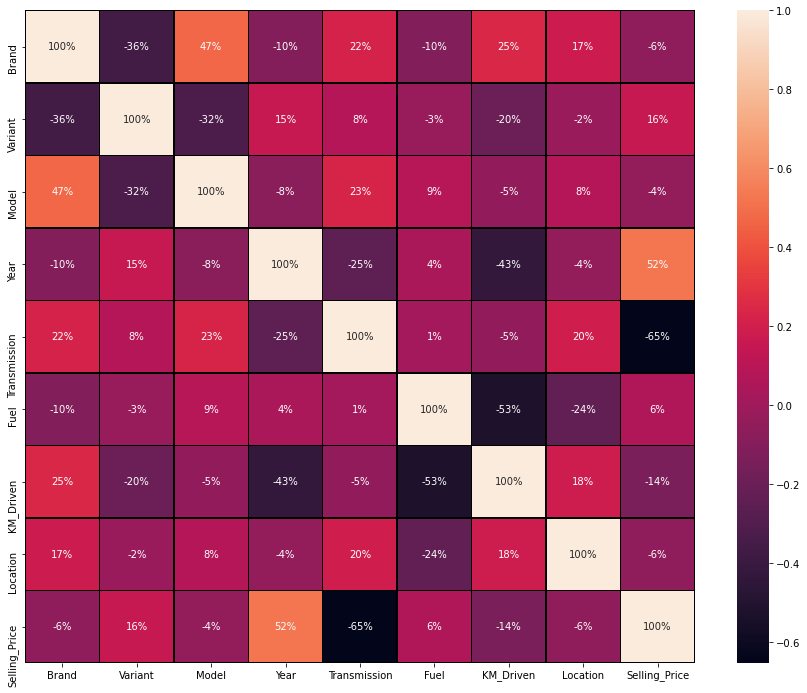

In [51]:
#Plotting heatmap for visualizing the correlation
plt.figure(figsize=(15,12))
sn.heatmap(corr,linewidth=0.5,linecolor='black',fmt='.0%',annot=True)
plt.show()

Text(0.5, 1.0, 'Correlation with Target variable')

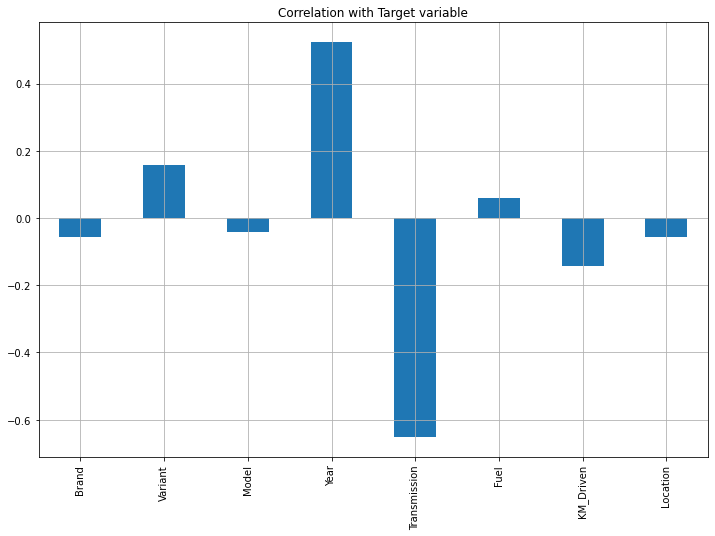

In [52]:
#Correlation with target variable
plt.figure(figsize=(12,8))
df.drop('Selling_Price',axis=1).corrwith(df['Selling_Price']).plot(kind='bar',grid=True)
plt.title('Correlation with Target variable')

# Checking skewness :

In [53]:
#checking the skewness
df.skew()

Brand           -0.238892
Variant          0.017713
Model           -0.111916
Year            -0.072629
Transmission    -1.707654
Fuel            -0.708647
KM_Driven        0.692775
Location        -0.037121
Selling_Price    3.237458
dtype: float64

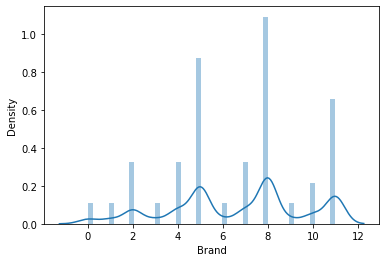

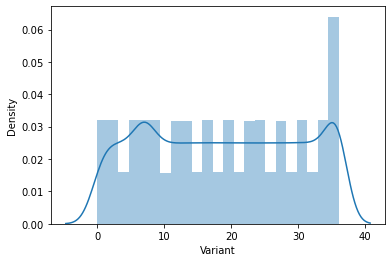

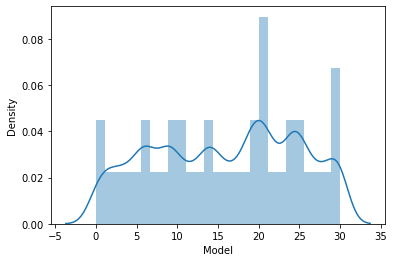

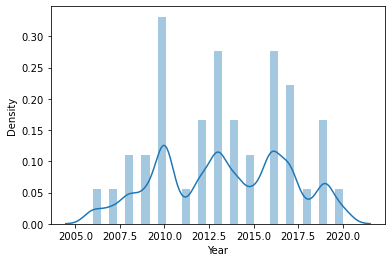

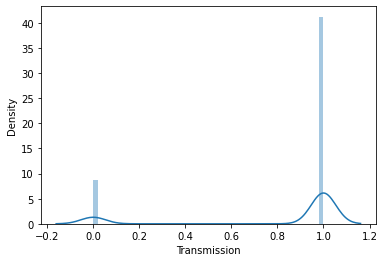

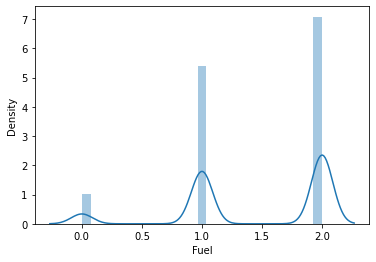

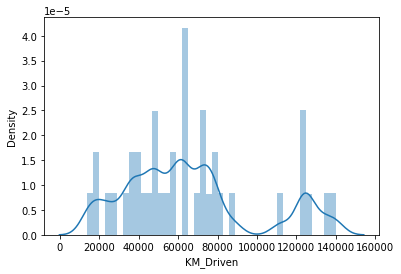

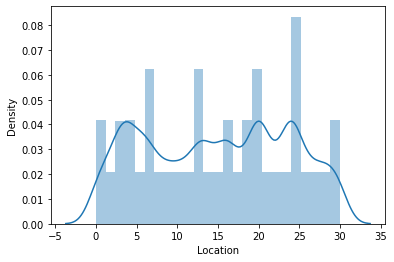

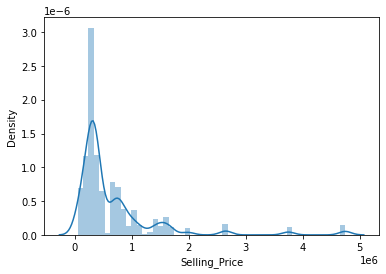

In [54]:
#Plotting distplot for checking the distribution of skewness
for col in df.describe().columns:
    sn.distplot(df[col])
    plt.show()

# Checking outliers :

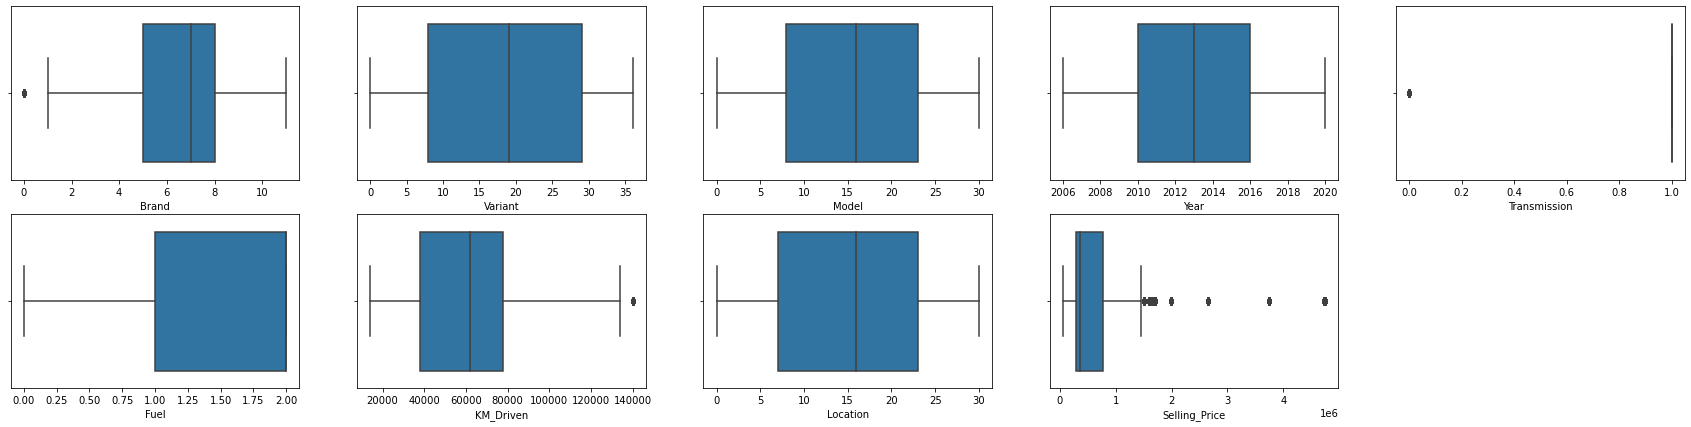

In [55]:
collist=df.columns.values
ncol=5
nrow=8
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sn.boxplot(df[collist[i]])

# Handling outliers by using z-score method :

In [56]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))   #converting all values into absolute values
threshold=3    #setting up a threshold
np.where(z>3)

(array([   25,    65,   105,   145,   185,   225,   265,   305,   345,
          385,   425,   464,   504,   544,   584,   624,   664,   704,
          744,   784,   824,   864,   904,   944,   984,  1024,  1064,
         1104,  1144,  1184,  1224,  1264,  1304,  1344,  1384,  1424,
         1463,  1502,  1542,  1582,  1622,  1662,  1701,  1741,  1781,
         1821,  1861,  1900,  1940,  1980,  2020,  2060,  2100,  2140,
         2180,  2220,  2260,  2300,  2340,  2380,  2420,  2460,  2500,
         2540,  2580,  2620,  2660,  2700,  2740,  2780,  2820,  2860,
         2899,  2939,  2979,  3018,  3058,  3098,  3138,  3178,  3218,
         3258,  3298,  3338,  3378,  3418,  3458,  3498,  3538,  3578,
         3618,  3657,  3697,  3737,  3777,  3817,  3857,  3897,  3937,
         3977,  4017,  4056,  4096,  4136,  4176,  4215,  4255,  4295,
         4335,  4375,  4415,  4455,  4495,  4535,  4575,  4615,  4655,
         4695,  4735,  4775,  4815,  4854,  4894,  4934,  4974,  5014,
      

In [57]:
#Removing outliers
df_new=df[(z<3).all(axis=1)]
df_new

,Brand,Variant,Model,Year,Transmission,Fuel,KM_Driven,Location,Selling_Price
0,5,16,30,2013,1,2,63000.0,7,340000.0
1,0,36,1,2016,0,2,72000.0,17,2650000.0
2,8,18,2,2016,1,2,37739.0,1,295000.0
3,8,36,24,2007,1,2,38000.0,4,285000.0
4,8,3,25,2015,1,2,51000.0,21,470000.0
...,...,...,...,...,...,...,...,...,...
17995,4,35,6,2016,1,2,58058.0,14,675000.0
17996,8,30,5,2018,1,1,48000.0,18,799999.0
17997,5,0,18,2009,1,2,38000.0,20,160000.0
17998,8,26,29,2010,1,2,64000.0,24,160000.0


In [58]:
#Original data dimensions
df.shape

(17913, 9)

In [59]:
#New data dimensions
df_new.shape

(17463, 9)

# Percentage loss of data after removing outliers :

In [60]:
dfshape = 17913
dfnewshape = 17463
total = dfshape-dfnewshape
percentage_loss=((total)/dfshape)*100   
print(percentage_loss)

2.5121420197621838


# Preparing dataset for model training :

In [61]:
df_x=df_new.drop('Selling_Price',axis=1) #Independent variables
y=df_new['Selling_Price'] #Target Variable

In [62]:
#Checking x data
df_x.head()

,Brand,Variant,Model,Year,Transmission,Fuel,KM_Driven,Location
0,5,16,30,2013,1,2,63000.0,7
1,0,36,1,2016,0,2,72000.0,17
2,8,18,2,2016,1,2,37739.0,1
3,8,36,24,2007,1,2,38000.0,4
4,8,3,25,2015,1,2,51000.0,21


In [63]:
#Checking y data after splitting
y.head()

0     340000.0
1    2650000.0
2     295000.0
3     285000.0
4     470000.0
Name: Selling_Price, dtype: float64

# Treating skewness :

In [64]:
#We are treating skewness by using square root transform
for col in df_x.skew().index:
    if col in df_x.describe().columns:
        if df_x[col].skew()>0.55:
            df_x[col]=np.sqrt(df_x[col])
        if df_x[col].skew()<-0.55:
            df_x[col]=np.sqrt(df_x[col])

In [65]:
#Checking skewness after treating it
df_x.skew()

Brand          -0.251332
Variant         0.067599
Model          -0.067264
Year           -0.059469
Transmission   -1.916301
Fuel           -1.826748
KM_Driven       0.195224
Location       -0.081364
dtype: float64

# Scaling the data :

In [66]:
#Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,Brand,Variant,Model,Year,Transmission,Fuel,KM_Driven,Location
0,-0.533280,-0.213255,1.631385,-0.058207,0.426813,0.728397,0.009725,-0.915092
1,-2.185166,1.573943,-1.667611,0.785805,-2.342949,0.728397,0.282987,0.223589
2,0.457851,-0.034535,-1.553852,0.785805,0.426813,0.728397,-0.884837,-1.598301
3,0.457851,1.573943,0.948834,-1.746232,0.426813,0.728397,-0.874263,-1.256697
4,0.457851,-1.374934,1.062593,0.504468,0.426813,0.728397,-0.387096,0.679062
...,...,...,...,...,...,...,...,...
17458,-0.863657,1.484583,-1.098818,0.785805,0.426813,0.728397,-0.148676,-0.118015
17459,0.457851,1.037784,-1.212577,1.348480,0.426813,-0.353225,-0.493416,0.337457
17460,-0.533280,-1.643014,0.266283,-1.183557,0.426813,0.728397,-0.874263,0.565194
17461,0.457851,0.680344,1.517627,-0.902220,0.426813,0.728397,0.041012,1.020666


# Model Building :

In [67]:
#Importing required metrices and model for the dataset
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [68]:
#Finding the best random state and r2_score
for i in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print('At random state',i,',the model performs well')
        print('Training r2_score is: ',r2_score(y_train,pred_train)*100)
        print('Testing r2_score is: ',r2_score(y_test,pred_test)*100)

At random state 54 ,the model performs well
Training r2_score is:  70.07096576957927
Testing r2_score is:  70.13238349195949
At random state 58 ,the model performs well
Training r2_score is:  70.08423009151878
Testing r2_score is:  70.10140926126549
At random state 60 ,the model performs well
Training r2_score is:  70.08257376435378
Testing r2_score is:  70.09190767021569
At random state 68 ,the model performs well
Training r2_score is:  70.09454430454532
Testing r2_score is:  70.0619973058046
At random state 83 ,the model performs well
Training r2_score is:  70.09747101108337
Testing r2_score is:  70.05752733796045
At random state 88 ,the model performs well
Training r2_score is:  70.08974187727294
Testing r2_score is:  70.05907571962359


In [69]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60,test_size=.20)

# Finding the best model :

In [70]:
LR=LinearRegression()
l=Lasso()
en=ElasticNet()
rd=Ridge()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
rf=RandomForestRegressor()
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor()

In [71]:
models= []
models.append(('Linear Regression',LR))
models.append(('Lasso Regression',l))
models.append(('Elastic Net Regression',en))
models.append(('Ridge Regression',rd))
models.append(('Decision Tree Regressor',dtr))
models.append(('KNeighbors Regressor',knr))
models.append(('RandomForestRegressor',rf))
models.append(('AdaBoostRegressor',ab))
models.append(('GradientBoostingRegressor',gb))

In [72]:
#Finding the required metrices for all models together using a for loop
Model=[]
score=[]
cvs=[]
sd=[]
mae=[]
mse=[]
rmse=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=r2_score(y_test,pre)
    print('r2_score: ',AS)
    score.append(AS*100)
    print('\n')
    std=cross_val_score(model,x,y,cv=5,scoring='r2').std()
    print('Standard Deviation: ',std)
    sd.append(std)
    print('\n')
    MAE=mean_absolute_error(y_test,pre)
    print('Mean Absolute Error: ',MAE)
    mae.append(MAE)
    print('\n')
    MSE=mean_squared_error(y_test,pre)
    print('Mean Squared Error: ',MSE)
    mse.append(MSE)
    print('\n')
    RMSE=np.sqrt(mean_squared_error(y_test,pre))
    print('Root Mean Squared Error: ',RMSE)
    rmse.append(RMSE)
    print('\n\n')

****************************** Linear Regression ***************************


LinearRegression()


r2_score:  0.7009190767021569


Standard Deviation:  0.004176297129112747


Mean Absolute Error:  186690.21999500436


Mean Squared Error:  75072876505.13025


Root Mean Squared Error:  273994.300132558



****************************** Lasso Regression ***************************


Lasso()


r2_score:  0.7009187514017794


Standard Deviation:  0.004176488155667048


Mean Absolute Error:  186689.664186288


Mean Squared Error:  75072958159.40227


Root Mean Squared Error:  273994.4491397632



****************************** Elastic Net Regression ***************************


ElasticNet()


r2_score:  0.6035359531868805


Standard Deviation:  0.010418121774755689


Mean Absolute Error:  198821.12051002315


Mean Squared Error:  99517201220.77126


Root Mean Squared Error:  315463.470501374



****************************** Ridge Regression ***************************


Ridge()


r2_score

In [73]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'r2_score': score, 'Standard_deviation':sd,
                    'Mean_absolute_error':mae, 'Mean_squared_error':mse, 'Root_Mean_Squared_error':rmse})
result

,Model,r2_score,Standard_deviation,Mean_absolute_error,Mean_squared_error,Root_Mean_Squared_error
0,Linear Regression,70.091908,0.004176,186690.219995,7.507288e+10,273994.300133
1,Lasso Regression,70.091875,0.004176,186689.664186,7.507296e+10,273994.449140
2,Elastic Net Regression,60.353595,0.010418,198821.120510,9.951720e+10,315463.470501
3,Ridge Regression,70.091662,0.004179,186683.667061,7.507349e+10,273995.426735
4,Decision Tree Regressor,98.504604,0.004318,26412.785451,3.753622e+09,61266.812784
5,KNeighbors Regressor,98.393689,0.005711,28907.337246,4.032031e+09,63498.278868
6,RandomForestRegressor,98.504502,0.004282,26405.140469,3.753879e+09,61268.904588
7,AdaBoostRegressor,91.078866,0.006218,113764.219438,2.239311e+10,149643.272442
8,GradientBoostingRegressor,98.484659,0.004060,27887.261475,3.803686e+09,61674.031129


# Hyperparameter Tuning :
#    Random Forest Regressor

In [74]:
#Creating parameter list to pass in GridSearchCV
parameters={'criterion':['mse','mae'],'n_estimators':[50,100,500],'max_features':['auto','sqrt','log2']}

In [75]:
#Using GridSearchCV to run the parameters and checking final accuracy
rf=RandomForestRegressor()
grid=GridSearchCV(rf,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_) #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'criterion': 'mse', 'max_features': 'auto', 'n_estimators': 50}
0.984574811251329


In [76]:
#Using the best parameters obtained
RF=RandomForestRegressor(random_state=48, n_estimators=500, criterion='mse', max_features='log2')
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('r2_score: ',r2_score(y_test,pred)*100)
print('Standard deviation: ',cross_val_score(RF,x,y,cv=5,scoring='r2').std())
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  98.50456691899329
Standard deviation:  0.004344321397752803
Mean absolute error:  26420.99733115128
Mean squared error:  3753715274.588142
Root Mean squared error:  61267.57114973746


# Finalizing the model :

In [77]:
rf_prediction=RF.predict(x)
print('Predictions of Random Forest Regressor: ',rf_prediction)

Predictions of Random Forest Regressor:  [ 329216.98054833 2389843.39078276  317941.42744627 ...  137383.0514037
  162438.04850012  280580.94305981]


In [78]:
#Comparing actual and predicted values with the help of a dataframe
predictions=pd.DataFrame({'Original_price':y, 'Predicted_price':rf_prediction})
predictions

,Original_price,Predicted_price
0,340000.0,3.292170e+05
1,2650000.0,2.389843e+06
2,295000.0,3.179414e+05
3,285000.0,2.853192e+05
4,470000.0,4.672959e+05
...,...,...
17995,675000.0,6.651467e+05
17996,799999.0,7.799048e+05
17997,160000.0,1.373831e+05
17998,160000.0,1.624380e+05


# Saving the model :

In [79]:
#Saving the model
import pickle
filename='Car_Price_Prediction.pkl'   #Specifying the filename
pickle.dump(RF,open(filename,'wb'))

In [80]:
#Saving the predicted values
results=pd.DataFrame(rf_prediction)
results.to_csv('Car_Price_Prediction_Results.csv')

# Conclusion:

# Key Findings and Conclusions of the Study:
    We collected the used cars data from olx and it was done by using Web scraping. The framework used for web scraping was Selenium, which has an advantage of automating our process of collecting data. We collected almost 18000 of data which contained the selling price and other related features.Then, the scrapped data was combined in a single data frame and saved in a csv file so that we can open it and analyse the data.We did data cleaning, data-preprocessing steps like finding and handling null values, removing words from numbers, converting object to int type, data visualization, handling outliers, etc.After separating our train and test data, we started running different machine learning classification algorithms to find out the best performing model.We found that RandomForest and KNeighbors Algorithms were performing well, according to their r2_score and cross val scores.Then, we performed Hyperparameter Tuning techniques using GridSearchCV for getting the best parameters and improving the scores. In that, RandomForestRegressor performed well and we finalised that model.We saved the model in pkl format and then saved the predicted values in a csv format.

# The problems we faced during this project were:

    No information for handling these fast-paced websites were informed so that we were consuming more time in web scraping itself. Many outliers were removed as some of the selling price and km values were out of range.
